In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage.measure import label

In [2]:
# %matplotlib notebook

In [3]:
#Пути и выбор картинки
paths = ['all.jpg', 'black_blue_green.jpg', 'black_red_yellow.jpg', 'red_green_blue.jpg', 
         'red_green_blue_inaccurate.jpg']

# path_to_img = paths[1]

In [4]:
img = cv2.imread(paths[4])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

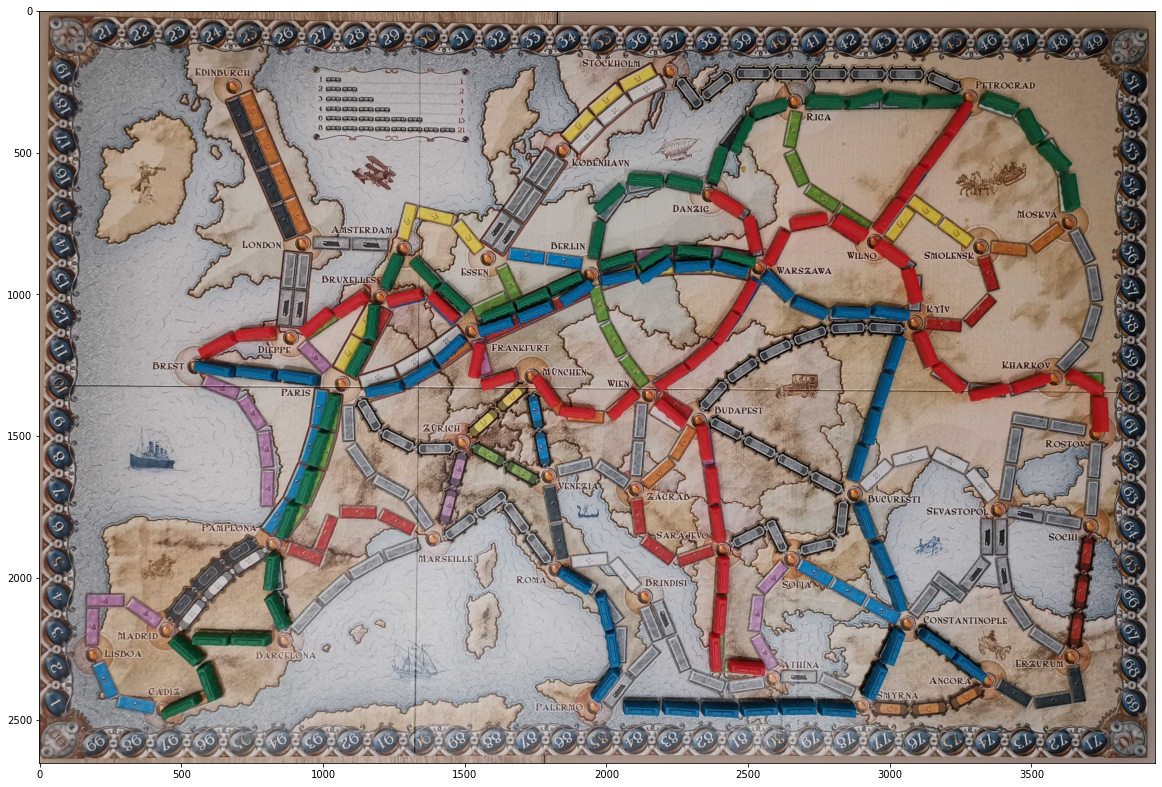

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

# Red

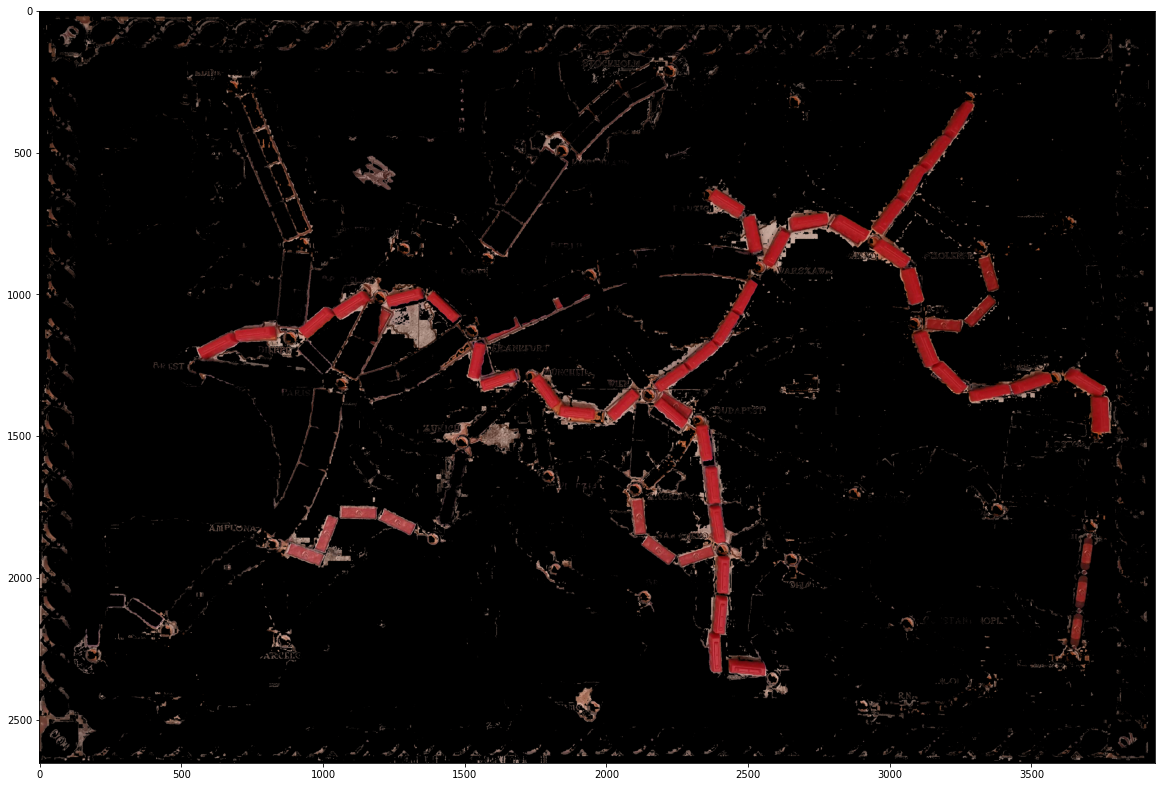

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#I find this border colors on the stackoverflow I suppose. lost the link (((
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
red_mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

lower_red = np.array([170, 50, 50])
upper_red = np.array([180, 255, 255])
red_mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

red_mask = red_mask0 + red_mask1

output_img = img.copy()
output_img[np.where(red_mask == 0)] = 0

output_hsv = img_hsv.copy()
output_hsv[np.where(red_mask == 0)] = 0

red_mask = cv2.cvtColor(output_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(20,20))
plt.imshow(red_mask)

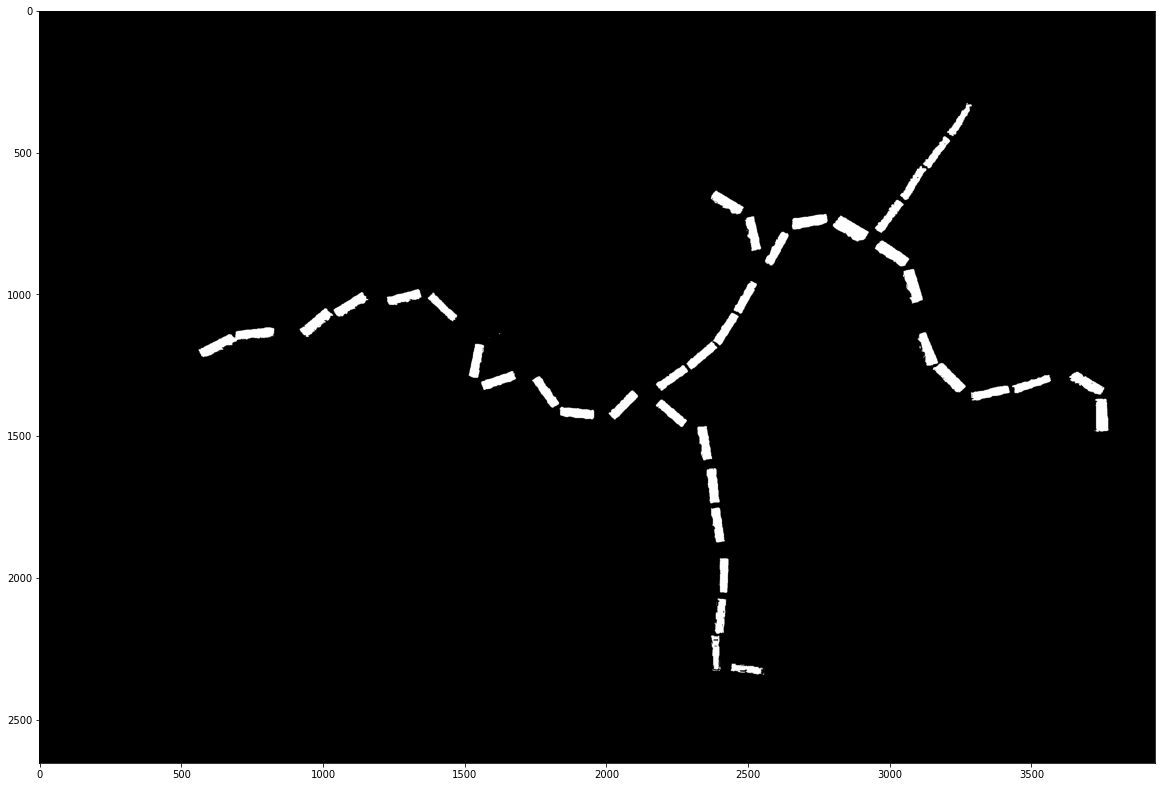

In [7]:
yuv_red = cv2.cvtColor(red_mask, cv2.COLOR_RGB2YUV)[:,:,2]
red = (yuv_red > 205).astype(dtype='uint8')

plt.figure(figsize=(20,20))
plt.imshow(red, cmap='gray')
plt.show()

In [8]:
contours_red , _ = cv2.findContours(red, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [9]:
area_red = []
for c in contours_red:
    area_red.append(cv2.contourArea(c))
    
area_red = np.array(area_red) 
area_red_big = area_red[area_red > 1000]
area_red_big.sort()


try:    
    conturs_to_save = []
    for i in area_red_big:
        conturs_to_save.append(np.where(area_red == i)[0][0])

    img_cont = img_rgb.copy()
    hw = []

    for i in conturs_to_save:
        rect = cv2.minAreaRect(contours_red[i])
#         box = cv2.boxPoints(rect)
#         box = np.int0(box)
        hw.append([rect[1][0],rect[1][1]])
#         cv2.drawContours(img_cont,[box],0,(0,0,255),2)


    hw = np.array(hw)
    hw = np.int0(hw[:,0]*hw[:,1])

    red_trains = []

    for i in hw: 
        if i < 7500:
            red_trains.append(1)

        elif 7500 < i < 18000:
            red_trains.append(2)

        elif 18000 < i < 38000:
            red_trains.append(3)

        else: 
            red_trains.append(4)
            
    red_trains = np.array(red_trains).sum()

except:
    red_trains = 0
    

In [10]:
red_trains

0

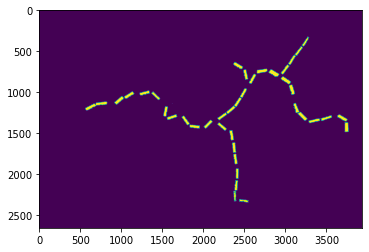

In [11]:
plt.imshow(red)

In [13]:
# a = np.array(rectangles)

In [14]:
# try:

#     wh = a[:, 2:]

#     s_wh = wh[:,1]*wh[:,0]
#     # s_wh.sort()
#     s_wh

#     red_trains = []
#     for i in s_wh:
#         if i < 14000:
#             red_trains.append(1)

#         if 14000 < i < 42000:
#             red_trains.append(2)

#         if 42000 < i < 95000:
#             red_trains.append(3)

#         if 95000 < i < 170000
#             red_trains.append(4)
            

#     red_trains = np.array(red_trains).sum()
    
# except:
#     red_trains = 0

0


### Поиск кол-ва красных поездов 34,35

In [16]:
# img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# #I find this border colors on the stackoverflow I suppose. lost the link (((
# lower_red = np.array([0, 50, 50])
# upper_red = np.array([10, 255, 255])
# red_mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# lower_red = np.array([170, 50, 50])
# upper_red = np.array([180, 255, 255])
# red_mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# red_mask = red_mask0 + red_mask1

# output_img = img_rgb.copy()
# output_img[np.where(red_mask == 0)] = 0

# output_hsv = img_hsv.copy()
# output_hsv[np.where(red_mask == 0)] = 0

# red_mask = cv2.cvtColor(output_hsv, cv2.COLOR_HSV2RGB)

# yuv_red = cv2.cvtColor(red_mask, cv2.COLOR_RGB2YUV)[:,:,2]
# red = (yuv_red > 205).astype(dtype='uint8')

# red_opening = cv2.morphologyEx(red, cv2.MORPH_OPEN, kernel=(3,3),iterations=3)
# red_dilation = cv2.dilate(red_opening ,kernel=(7,7),iterations = 5)

# contours_red , _ = cv2.findContours(red_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# area_red = []
# for c in contours_red:
#     area_red.append(cv2.contourArea(c))

# area_red = np.array(area_red) 

# area_red = area_red[area_red > 2000]

# for i in range(len(area_red)):
#     if area_red[i] < 6700:  
#         #1
#         area_red[i] = 1
#     elif 6700 < area_red[i] < 11500:
#         #2
#         area_red[i] = 2
#     elif 11500 < area_red[i] < 17000:
#         #3
#         area_red[i] = 3
#     elif 17000 < area_red[i]:
#         #4
#         area_red[i] = 4

# red_trains = area_red.sum()

40.0

In [16]:
# img_cont = img.copy()
# plt.figure(figsize=(20,20))
# plt.imshow(cv2.drawContours(img_cont, contours[41], -1, (0,255,0), 3))
# # shapes_red = shapes_red[shapes_red > 2300]

In [17]:
# #1
# 2029.5, 6043
# 2745., 5052
# 3511.5, 5617
# 6145.5

In [18]:
# #2
# 9846.5
# 8496. , 9102.5
# 7060.,  9169.
# 9875.5

In [ ]:
# #3
# 14361, 16375.5

In [28]:
# # 4
# 18350.5

In [9]:
# pattern_gray = red_gray[1690:1720, 2036:2065] #0.6
# pattern_red = red[1690:1720, 2036:2065,0] #0.5
# pattern_yuv = yuv[1690:1720, 2036:2065,2]


# plt.imshow(pattern_gray)
# plt.show()

# plt.imshow(pattern_red)
# plt.show()

# plt.imshow(pattern_yuv)
# plt.show()

In [10]:
# def get_local_centers(corr, th):
#     lbl, n = label(corr >= th, connectivity=2, return_num=True)
#     return np.int16([np.round(np.mean(np.argwhere(lbl == i), axis=0)) for i in range(1, n + 1)])


# def plot_rectangles(img, points, bbox_shape):
#     points = np.int16(points)[::, ::-1]
#     res_img = np.int16(img.copy())
#     for pt in points:
#         cv2.rectangle(res_img, (pt[0] - bbox_shape[0] // 2, pt[1] - bbox_shape[1] // 2),
#                       (pt[0] + bbox_shape[0] // 2, pt[1] + bbox_shape[1] // 2), (0, 255, 0), 3)
#     return res_img

In [12]:
# # pattern_gray = red_gray[1807:1835,2099:2134]
# # pattern_red = red[1807:1835,2099:2134,0]
# # pattern_s = output_hsv[1807:1835,2099:2134,1]
# # pattern_v = output_hsv[1807:1835,2099:2134,2]

# corr = match_template(yuv[:,:,2], pattern_yuv, pad_input=True)
# points = get_local_centers(corr, 0.6)
# res = plot_rectangles(img, points, pattern_gray.shape)

# plt.figure(figsize=(20,20))
# plt.imshow(res)

In [1]:
# plt.figure(figsize=(20,20))
# plt.imshow(img[:,:,1], cmap='gray')

# plt.show()

In [2]:
# HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

In [3]:
# HUE = HLS[:, :, 0]              # Split attributes
# LIGHT = HLS[:, :, 1]
# SAT = HLS[:, :, 2]

# plt.figure(dpi=250)
# plt.subplot(1,3,1)              # Plot color attributes
# plt.imshow(HUE, cmap='gray')
# plt.title('HUE')
# plt.axis('off')
# plt.subplot(1,3,2)
# plt.imshow(SAT, cmap='gray')
# plt.title('SATURATION')
# plt.axis('off')
# plt.subplot(1,3,3)
# plt.imshow(LIGHT, cmap='gray')
# plt.title('LIGHT')
# plt.axis('off')
# plt.show()

In [4]:
# plt.imshow(img)

In [5]:
# plt.imshow(img[990:1100,1500:1600])

In [6]:
# plt.figure(dpi=150)
# plt.subplot(1,2,1)   
# plt.imshow(img[990:1100,1500:1600])
# plt.subplot(1,2,2)     
# plt.imshow(LIGHT[990:1100,1500:1600], cmap="gray")

In [7]:
# plt.hist(LIGHT[990:1100,1500:1600].flatten());

In [8]:
# mask = (LIGHT < 70) 
# img2 = img.copy()
# # img2[mask] = 0

# plt.figure(dpi=150)
# plt.subplot(1,2,1)   
# # plt.axis('off')
# plt.imshow(img2)
# plt.subplot(1,2,2)     
# # plt.axis('off')
# plt.imshow(mask, cmap="gray")

# Часть 1

In [3]:
# cv2.imread('/autograder/source/train/all.jpg')

In [4]:
def predict_image(path_to_img):
    #Обработка начальной картинки и поиск паттерны (у меня их 9!)
#     img = cv2.
    img = cv2.imread(path_to_img)
    img_gray = rgb2gray(img)
    
    pattern = rgb2gray(cv2.imread(paths[0]))[1195:1247, 1652:1705]
    sh = pattern.shape[0]//2
    #full, pattern_half_top, pattern_half_bottom, pattern_half_left, pattern_half_right, pattern_top_left, 
    #pattern_top_right, pattern_bottom_left, pattern_bottom_left
    all_patterns = [pattern, pattern[:sh, :], pattern[sh:, :], pattern[:, sh:], pattern[:, :sh],
               pattern[:sh+5, :sh+5], pattern[:sh+5, sh-5:], pattern[sh-5:, sh-5:], pattern[sh-5:, :sh+5]]
    
    
    #Функция для поисков центров
    def get_local_centers(corr, th):
        lbl, n = label(corr >= th, connectivity=2, return_num=True)
        points = np.int16([np.round(np.mean(np.argwhere(lbl == i), axis=0)) for i in range(1, n + 1)])
        
        return points
    
    
    #Функция для закрашивания
    def plot_rectangles(img, points, bbox_shape, n_pattern):
        try:
            points = np.int16(points)[::, ::-1]
            res_img = np.int16(img)
            for pt in points:
                cv2.rectangle(res_img, (pt[0] - bbox_shape[0] // 2, pt[1] - bbox_shape[1] // 2),
                            (pt[0] + bbox_shape[0] // 2, pt[1] + bbox_shape[1] // 2), (0,255,0), -1)
                            

            return res_img

        except:
            return img
        
    #Алгоритм    
    all_points = []
    for i in range(len(all_patterns)):

        corr = match_template(img_gray, all_patterns[i], pad_input=True)
        points = get_local_centers(corr, .8)
        res = plot_rectangles(img, points, pattern.shape, i)

        img = res    
        img_gray = rgb2gray(img)
        all_points.append(points)


#     detected_centers = 0
#     for p in all_points:
#         detected_centers += len(p)
     
    if all_points[1].size != 0:
        all_points[1][:,0] = all_points[1][:,0] + 10
        centers = np.append(all_points[0], all_points[1], axis = 0)
        
    if all_points[2].size != 0:
        all_points[2][:,0] = all_points[2][:,0] - 13
        centers = np.append(centers, all_points[2], axis = 0)
        
    if all_points[3].size != 0:
        all_points[3][:,1] = all_points[3][:,1] - 15
        centers = np.append(centers, all_points[3], axis = 0)
        
    if all_points[4].size != 0:
        all_points[4][:,1] = all_points[4][:,1] + 14
        centers = np.append(centers, all_points[4], axis = 0)
        
    if all_points[5].size != 0:
        all_points[5][:,1] = all_points[5][:,1] + 10
        all_points[5][:,0] = all_points[5][:,0] + 10
        centers = np.append(centers, all_points[5], axis = 0)
        
    if all_points[6].size != 0:
        all_points[6][:,0] = all_points[6][:,0] + 10
        all_points[6][:,1] = all_points[6][:,1] - 10
        centers = np.append(centers, all_points[6], axis = 0)
        
    if all_points[7].size != 0:
        all_points[7][:,0] = all_points[7][:,0] - 10
        all_points[7][:,1] = all_points[7][:,1] - 10
        centers = np.append(centers, all_points[7], axis = 0)
        
    if all_points[8].size != 0:
        all_points[8][:,0] = all_points[8][:,0] - 10
        all_points[8][:,1] = all_points[8][:,1] + 10
        centers = np.append(centers, all_points[8], axis = 0)
#     print(detected_centers)

    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()
    centers = centers.tolist()

    return centers

In [6]:
# #1ая картинка
# path_to_img = paths[0]
# points_0 = predict_image(path_to_img)

In [60]:
# #Вторая
# path_to_img = paths[1]
# points_1 = predict_image(path_to_img)

In [61]:
# #Третья
# path_to_img = paths[2]
# points_2 = predict_image(path_to_img)

In [62]:
# #Четвертая
# path_to_img = paths[3]
# points_3 = predict_image(path_to_img)

In [63]:
# #Пятая
# path_to_img = paths[4]
# points_4 = predict_image(path_to_img)